In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/Admin/Downloads/customer_booking.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 14695: invalid continuation byte

In [1]:
import pandas as pd
data = pd.read_csv( "C:/Users/Admin/Downloads/customer_booking.csv", encoding='latin-1')

In [3]:
print(data.columns)

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [4]:
unique_values_dict = {}

# Iterate over each column and get unique values
for column in data.columns:
    unique_values_dict[column] = data[column].unique()

# Print unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print() 

Unique values for column 'num_passengers':
[2 1 3 4 6 5 7 9 8]

Unique values for column 'sales_channel':
['Internet' 'Mobile']

Unique values for column 'trip_type':
['RoundTrip' 'CircleTrip' 'OneWay']

Unique values for column 'purchase_lead':
[262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 135

In [5]:
booking_complete_counts = data['booking_complete'].value_counts()

print("Number of unique values for 'booking_complete' column:")
print(booking_complete_counts)

Number of unique values for 'booking_complete' column:
0    42522
1     7478
Name: booking_complete, dtype: int64


# Label encoding

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

# Define the categorical columns to be label encoded
categorical_columns = ['sales_channel', 'trip_type', 'booking_origin', 'route', 'flight_day']

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target variable
X = data.drop(columns=['booking_complete'])  # Drop the target column
y = data['booking_complete']


# Normalisation

In [4]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(X)
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = X.columns)
# add the labels back to the dataframe
scaled_df['Target']  = y
scaled_df


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Target
0,0.400684,-0.355785,0.095325,1.957530,-0.119353,-0.381764,-0.527073,-1.724217,0.694118,0.703747,-0.649919,-0.863497,-1.174175,0
1,-0.579559,-0.355785,0.095325,0.299164,-0.089844,-1.120780,-0.527073,-1.724217,0.694118,-1.420965,-0.649919,-0.863497,-1.174175,0
2,0.400684,-0.355785,0.095325,1.747470,-0.030824,1.465775,1.443552,-1.724217,-0.069097,0.703747,1.538654,-0.863497,-1.174175,0
3,-0.579559,-0.355785,0.095325,0.122272,0.234761,-0.936026,-0.527073,-1.724217,0.694118,-1.420965,-0.649919,1.158082,-1.174175,0
4,0.400684,-0.355785,0.095325,-0.187290,-0.030824,1.096267,1.443552,-1.724217,-0.069097,0.703747,-0.649919,1.158082,-1.174175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.355785,0.095325,-0.640577,-0.502977,-0.012257,-0.527073,1.443473,-1.046010,0.703747,-0.649919,1.158082,-1.107368,0
49996,-0.579559,-0.355785,0.095325,0.288108,-0.502977,-0.936026,-0.034417,1.443473,-1.046010,-1.420965,-0.649919,-0.863497,-1.107368,0
49997,-0.579559,-0.355785,0.095325,-0.673744,-0.502977,2.389544,-0.527073,1.443473,-1.046010,-1.420965,-0.649919,1.158082,-1.107368,0
49998,-0.579559,-0.355785,0.095325,-0.773246,-0.502977,0.357251,-1.019730,1.443473,-1.046010,0.703747,-0.649919,1.158082,-1.107368,0


# Balancing the data

In [7]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.Target ==0].sample(n=8000)
#concatenate the two dataframes
scaled_df_new = pd.concat([scaled_df[scaled_df.Target==1], scaled_df_0], ignore_index=True)
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [8]:
scaled_df_new

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Target
0,-0.579559,-0.355785,0.095325,-0.762190,-0.591506,0.357251,1.443552,1.029914,-1.046010,-1.420965,1.538654,-0.863497,1.037139,0
1,-0.579559,-0.355785,0.095325,-0.552131,0.972500,-0.381764,-1.512386,0.809935,0.388832,0.703747,-0.649919,-0.863497,-1.688589,1
2,-0.579559,-0.355785,0.095325,0.719283,-0.532487,0.357251,-1.019730,1.065110,-1.046010,0.703747,1.538654,1.158082,1.037139,0
3,0.400684,-0.355785,0.095325,0.553447,-0.561996,-0.751272,-1.512386,-0.369149,1.426803,0.703747,-0.649919,-0.863497,-0.633037,0
4,-0.579559,-0.355785,0.095325,3.416892,-0.532487,-0.936026,-1.019730,-0.021583,0.144603,-1.420965,1.538654,-0.863497,0.195370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,-0.579559,2.810688,0.095325,-0.762190,1.710239,0.542005,0.458239,-1.073080,-1.046010,0.703747,1.538654,1.158082,1.037139,0
15474,0.400684,-0.355785,0.095325,-0.839581,-0.532487,0.726759,-0.034417,-0.069979,-0.649139,-1.420965,-0.649919,-0.863497,-0.572911,1
15475,2.361172,-0.355785,0.095325,-0.695856,0.234761,-1.305534,1.443552,0.343581,0.388832,0.703747,-0.649919,-0.863497,-1.688589,1
15476,-0.579559,-0.355785,0.095325,-0.552131,0.116723,0.357251,0.458239,1.271890,-1.046010,-1.420965,-0.649919,-0.863497,1.037139,0


In [9]:
scaled_df_new['Target'].value_counts()

0    8000
1    7478
Name: Target, dtype: int64

# Fitting the data

Gradient Boosting Classifier

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate features and target variable
X = scaled_df_new.drop(columns=['Target'])  # Features
y = scaled_df_new['Target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()

# Train the model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Accuracy of Gradient Boosting Tree:", accuracy_gb)
# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy of Gradient Boosting Tree: 0.7070413436692506
Precision: 0.683947532792005
Recall: 0.731951871657754
F1-score: 0.7071359380045205


Support vector machine classifier

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC()

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy of Support Vector Machine:", accuracy_svm)

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of Support Vector Machine: 0.6550387596899225
Precision: 0.6368286445012787
Recall: 0.6657754010695187
F1-score: 0.6509803921568628


LogisticRegression

In [23]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_log = logistic_regression.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_log)

print("Accuracy of Logistic Regression:", accuracy)

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Accuracy of Logistic Regression: 0.625968992248062
Precision: 0.6152796725784447
Recall: 0.6029411764705882
F1-score: 0.6090479405806887


Naive Baiyes

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Train the model on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy of Naive Bayes Classifier:", accuracy_nb)

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of Naive Bayes Classifier: 0.5849483204134367
Precision: 0.5454937473048728
Recall: 0.8455882352941176
F1-score: 0.6631716906946264


Random Forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

# Train the model on the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Random Forest Classifier:", accuracy_rf)

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of Random Forest Classifier: 0.6999354005167958
Precision: 0.6837329876863253
Recall: 0.7052139037433155
F1-score: 0.6943073379401119


Plotting ROC curve for each

Logistic regression

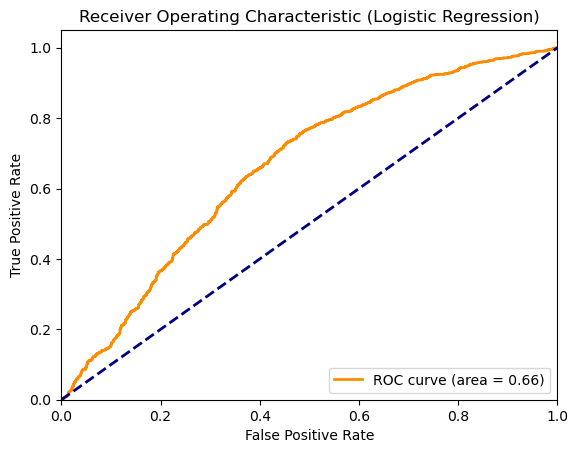

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


Gradient boost tree

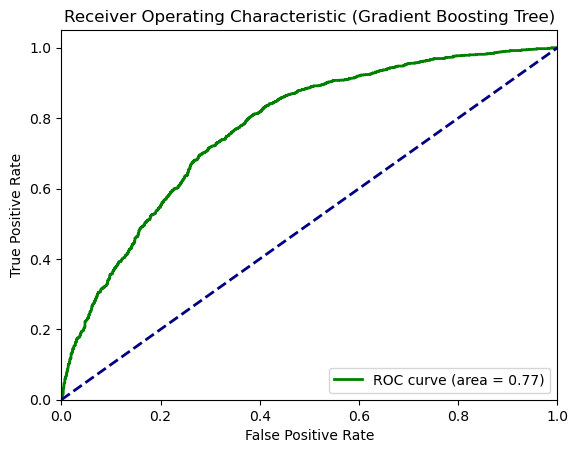

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Tree model
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob_gbt = gbt.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_gbt, tpr_gbt, _ = roc_curve(y_test, y_pred_prob_gbt)
roc_auc_gbt = auc(fpr_gbt, tpr_gbt)

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbt, tpr_gbt, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gbt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting Tree)')
plt.legend(loc="lower right")
plt.show()


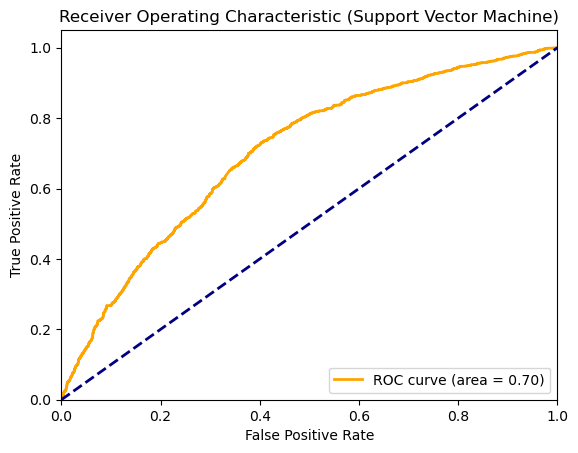

In [33]:
from sklearn.svm import SVC

# Train Support Vector Machine model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Support Vector Machine)')
plt.legend(loc="lower right")
plt.show()


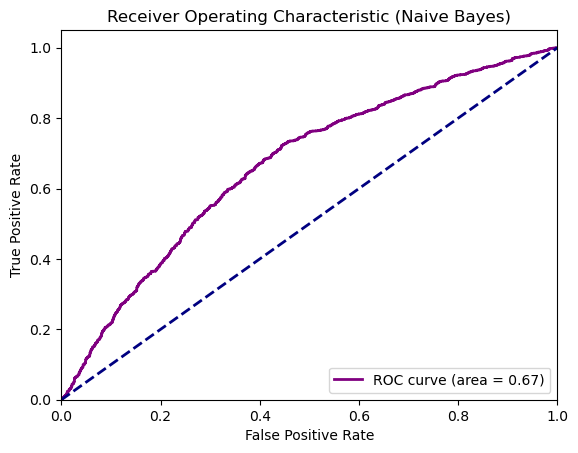

In [34]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()


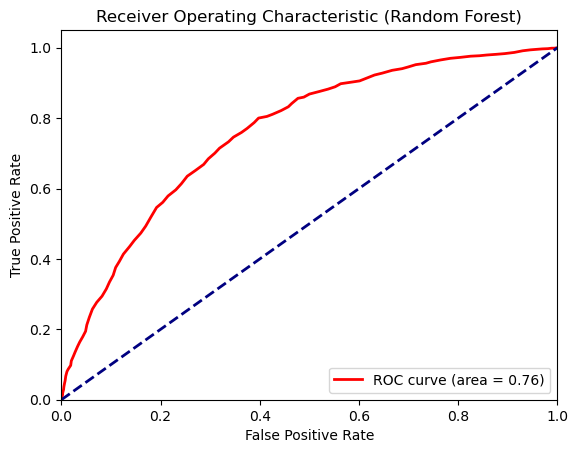

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()


# Finding the important features

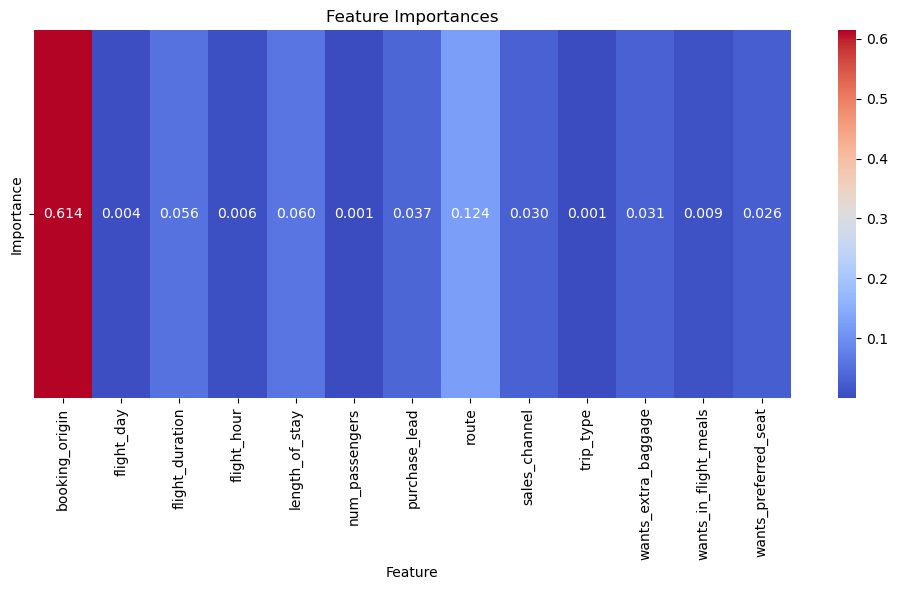

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

# Initialize the Gradient Boosting Tree classifier
gbt = GradientBoostingClassifier()

# Fit the classifier to the training data
gbt.fit(X_train, y_train)

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns[indices], 'Importance': feature_importances[indices]})

plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance_df.pivot_table(index='Feature', aggfunc='sum').T, cmap='coolwarm', annot=True, fmt=".3f")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


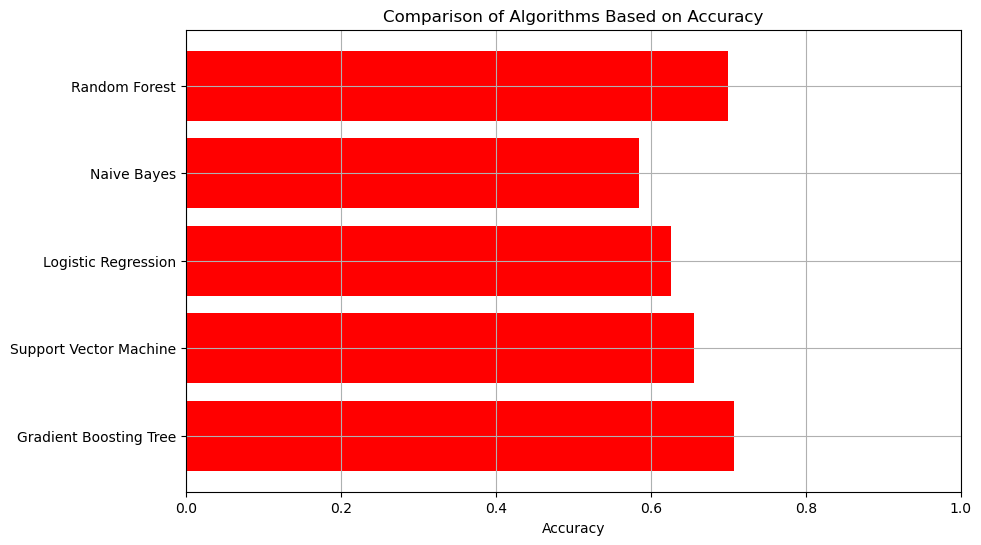

In [42]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding accuracies
algorithms = ['Random Forest', 'Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Gradient Boosting Tree']
accuracies = [0.6999354005167958, 0.5849483204134367, 0.625968992248062, 0.6550387596899225, 0.7070413436692506]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.barh(algorithms, accuracies, color='red')
plt.xlabel('Accuracy')
plt.title('Comparison of Algorithms Based on Accuracy')
plt.xlim(0, 1)  # Set the x-axis limit from 0 to 1
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top
plt.grid()
plt.show()
